In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

df=pd.read_csv("Week7_train.csv")

In [4]:
df


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
print("Shape Of the data",df["label"].value_counts)


Shape Of the data <bound method IndexOpsMixin.value_counts of 0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64>


In [21]:
df_sampled = df.sample(frac=0.1)
print("Shape of the selected dataset:", df_sampled.shape)


Shape of the selected dataset: (4200, 785)


In [22]:
print(df_sampled.head())


       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
34472      5       0       0       0       0       0       0       0       0   
13143      3       0       0       0       0       0       0       0       0   
32862      7       0       0       0       0       0       0       0       0   
29616      6       0       0       0       0       0       0       0       0   
40962      8       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
34472       0  ...         0         0         0         0         0   
13143       0  ...         0         0         0         0         0   
32862       0  ...         0         0         0         0         0   
29616       0  ...         0         0         0         0         0   
40962       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
34472         0         0   

In [11]:
print(df_sampled.iloc[:,-1].nunique())

1


In [21]:
print(df_sampled.iloc[:, -1].value_counts()) 


pixel783
0    4200
Name: count, dtype: int64


In [23]:
X = df_sampled.iloc[:, :-1]  # All columns except last one
Y = df_sampled.iloc[:, -1]   # Last column (target)


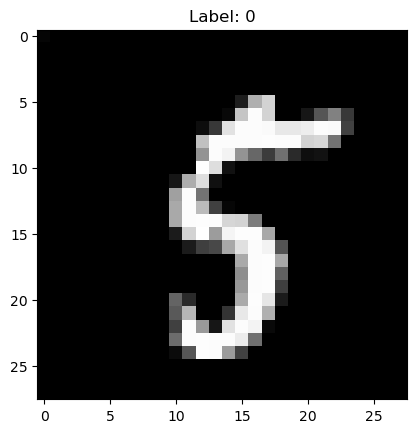

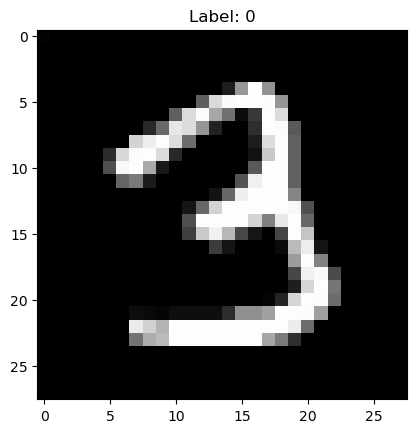

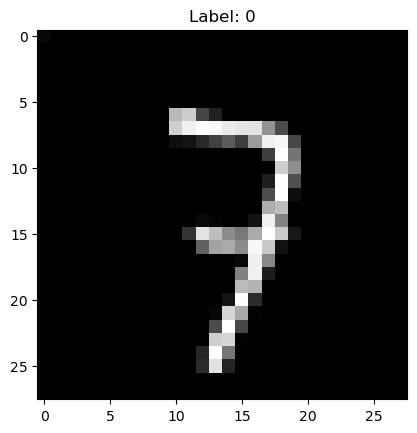

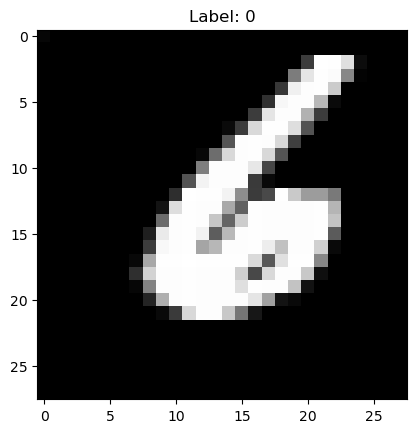

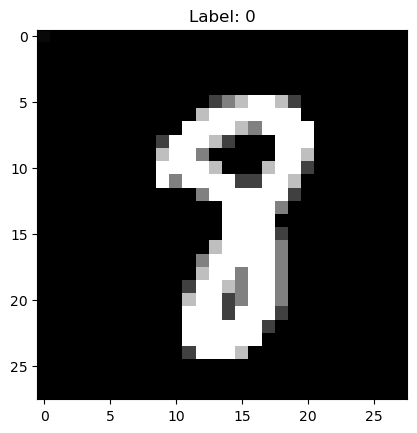

In [24]:
for i in range(5):
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')  # Reshaping assuming 28x28 images
    plt.title(f"Label: {Y.iloc[i]}")
    plt.show()


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


In [26]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [27]:
Y_pred = knn.predict(X_test)


In [28]:

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1050]]


In [29]:
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050

    accuracy                           1.00      1050
   macro avg       1.00      1.00      1.00      1050
weighted avg       1.00      1.00      1.00      1050



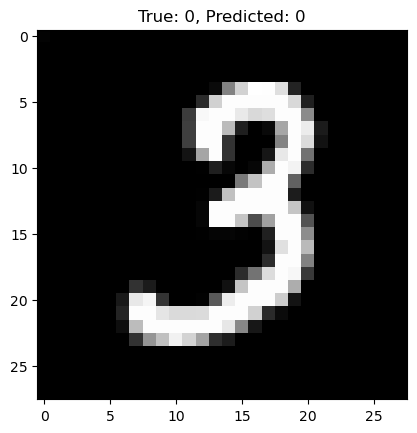

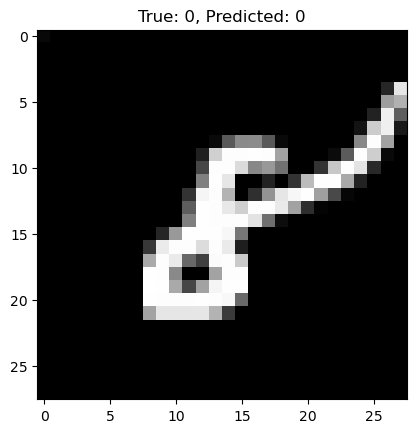

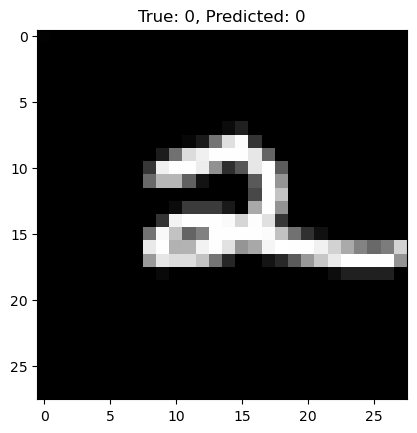

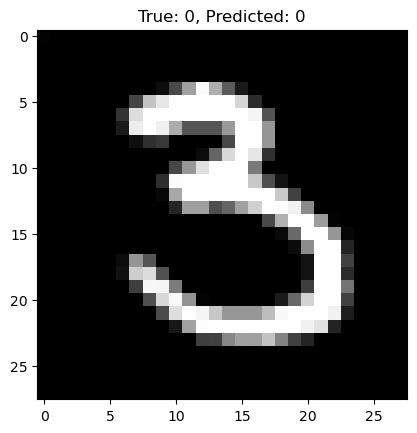

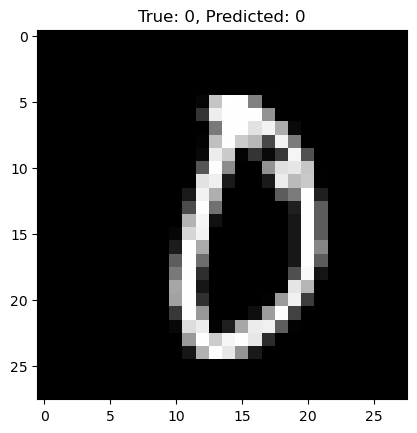

In [27]:
for i in range(5):
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')  # Adjust dimensions if needed
    plt.title(f"True: {Y_test.iloc[i]}, Predicted: {Y_pred[i]}")
    plt.show()
